In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import scanpy as sc
plt.rcParams['font.family'] = 'Helvetica Neue'

In [2]:
#enrichment_df = pd.read_parquet('results/clustering_nde30ntotal75.parquet')
manual_annotation = pd.read_csv('results/clustering_nde30ntotal75_manual_annotated.csv')

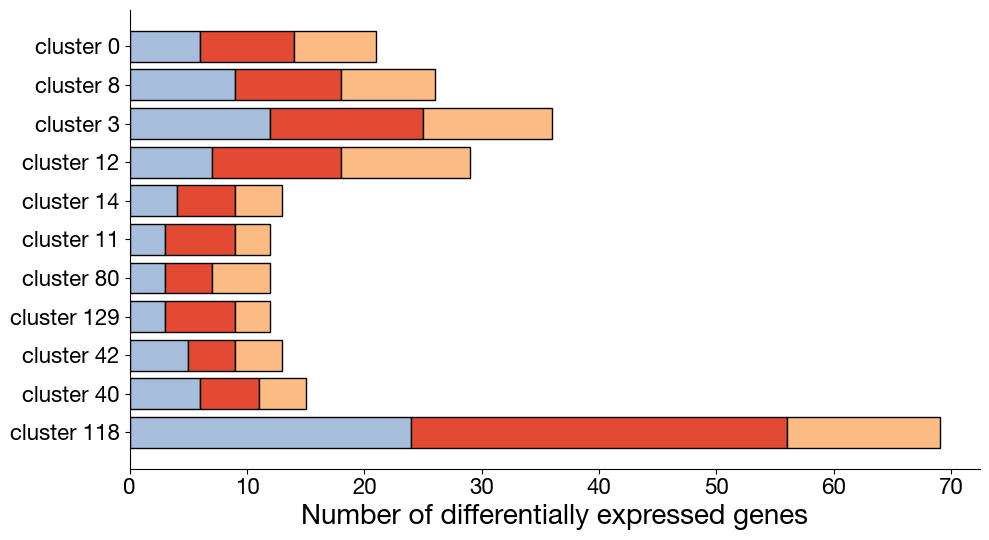

In [136]:
test = manual_annotation[['cluster', 'rest_count', 'stim8hr_count', 'stim48hr_count']].copy()
test['cluster'] = test['cluster'].astype(str).apply(lambda x: 'cluster ' + x)
test = test.set_index('cluster')
test = test.iloc[:11][::-1]

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 5.5))

ax.barh(test.index, test['rest_count'], 
        label='rest_count', color='#a6bddb', edgecolor='black')
ax.barh(test.index, test['stim8hr_count'], 
        left=test['rest_count'], label='stim8hr_count', 
        color='#e34a33', edgecolor='black')
ax.barh(test.index, test['stim48hr_count'], 
        left=test['rest_count'] + test['stim8hr_count'], 
        label='stim48hr_count', color='#fdbb84', edgecolor='black')

# Add a title and labels
ax.set_xlabel('Number of differentially expressed genes', fontsize=20)
ax.tick_params(labelsize=16)

sns.despine()

# Display the plot
plt.tight_layout()
plt.savefig('results/scenario1.png')
plt.show()

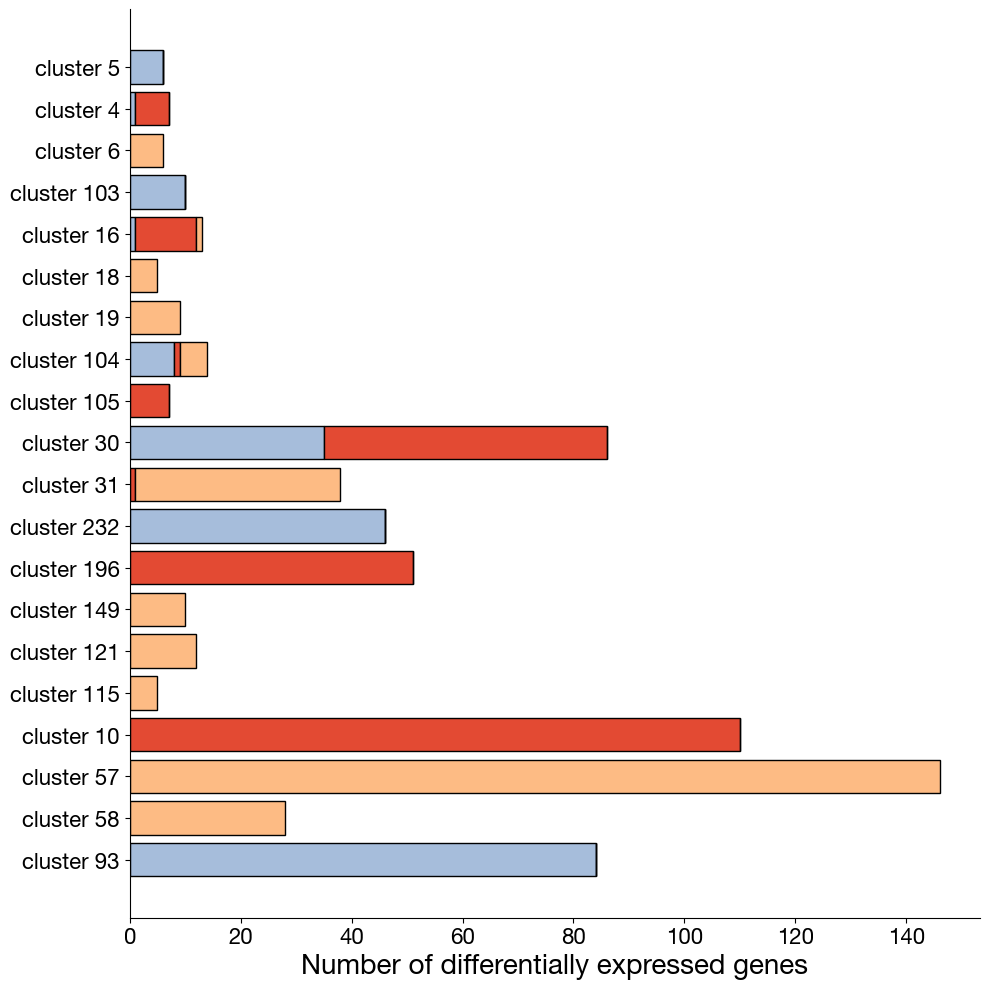

In [137]:
test = manual_annotation[['cluster', 'rest_count', 'stim8hr_count', 'stim48hr_count']].copy()
test['cluster'] = test['cluster'].astype(str).apply(lambda x: 'cluster ' + x)
test = test.set_index('cluster')
test = test.iloc[12:32][::-1]

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 10))

ax.barh(test.index, test['rest_count'], 
        label='rest_count', color='#a6bddb', edgecolor='black')
ax.barh(test.index, test['stim8hr_count'], 
        left=test['rest_count'], label='stim8hr_count', 
        color='#e34a33', edgecolor='black')
ax.barh(test.index, test['stim48hr_count'], 
        left=test['rest_count'] + test['stim8hr_count'], 
        label='stim48hr_count', color='#fdbb84', edgecolor='black')

# Add a title and labels
ax.set_xlabel('Number of differentially expressed genes', fontsize=20)
ax.tick_params(labelsize=16)

# Create custom legend patches to display the colors and hatches correctly
rest_patch = mpatches.Patch(facecolor='#4c72b0', hatch='/', label='rest_count')
stim8hr_patch = mpatches.Patch(facecolor='#55a868', hatch='o', label='stim8hr_count')
stim48hr_patch = mpatches.Patch(facecolor='#c44e52', hatch='x', label='stim48hr_count')

sns.despine()

# Display the plot
plt.tight_layout()
plt.savefig('results/scenario2.png')
plt.show()

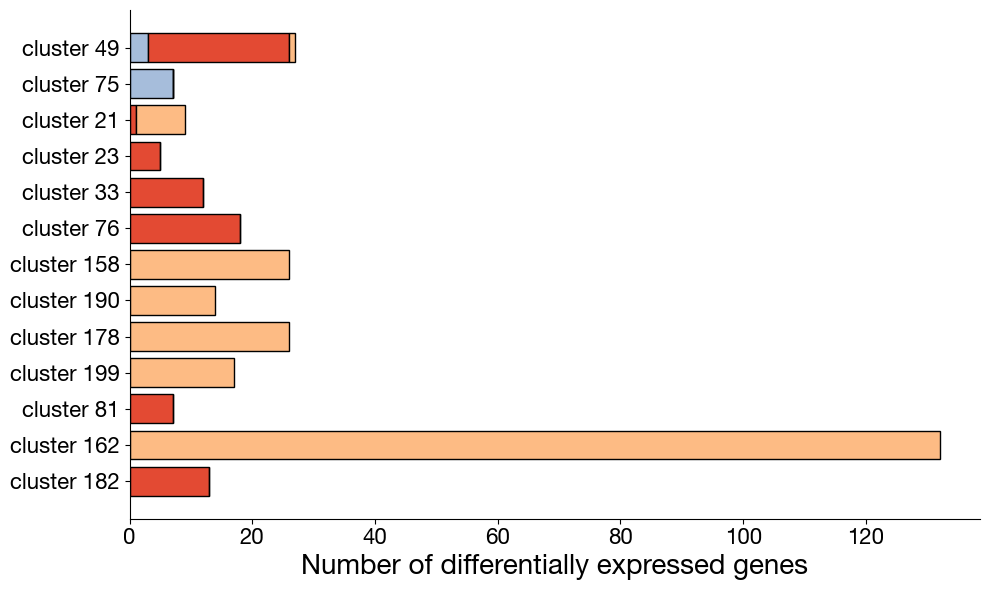

In [5]:
test = manual_annotation[['cluster', 'rest_count', 'stim8hr_count', 'stim48hr_count']].copy()
test['cluster'] = test['cluster'].astype(str).apply(lambda x: 'cluster ' + x)
test = test.set_index('cluster')
test = test.iloc[41:54][::-1]

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(test.index, test['rest_count'], 
        label='rest_count', color='#a6bddb', edgecolor='black')
ax.barh(test.index, test['stim8hr_count'], 
        left=test['rest_count'], label='stim8hr_count', 
        color='#e34a33', edgecolor='black')
ax.barh(test.index, test['stim48hr_count'], 
        left=test['rest_count'] + test['stim8hr_count'], 
        label='stim48hr_count', color='#fdbb84', edgecolor='black')

# Add a title and labels
ax.set_xlabel('Number of differentially expressed genes', fontsize=20)
ax.tick_params(labelsize=16)

# Create custom legend patches to display the colors and hatches correctly
rest_patch = mpatches.Patch(facecolor='#4c72b0', hatch='/', label='rest_count')
stim8hr_patch = mpatches.Patch(facecolor='#55a868', hatch='o', label='stim8hr_count')
stim48hr_patch = mpatches.Patch(facecolor='#c44e52', hatch='x', label='stim48hr_count')

sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

### Draw example correlation matrix

In [6]:
datadir = '/Users/rzhu/Gladstone Dropbox/Ronghui Zhu/GRNPerturbSeq/3_expts/processed_data/CD4i_final'
experiment_name = 'CD4i_final'
adata = sc.read_h5ad(datadir + f'/DE_results_all_confounders/{experiment_name}.merged_DE_results.h5ad')
adata.layers['zscore'] = adata.layers['log_fc'] / adata.layers['lfcSE']
adata.layers['zscore'][np.where(adata.layers['zscore'] > 50)] = 50
adata.var_names = adata.var.gene_name
adata.X = np.nan_to_num(adata.layers['zscore'], 0)

In [ ]:
adata_final = sc.read_h5ad('../../../RZAnalysisCodes/results/nde30ntotal75_clustering.h5ad')

In [107]:
adata_final.obs.hdbscan.unique()

[76, 77, 193, 3, 57, ..., 132, 23, 6, 144, 150]
Length: 114
Categories (114, int64): [0, 3, 4, 5, ..., 228, 229, 231, 232]

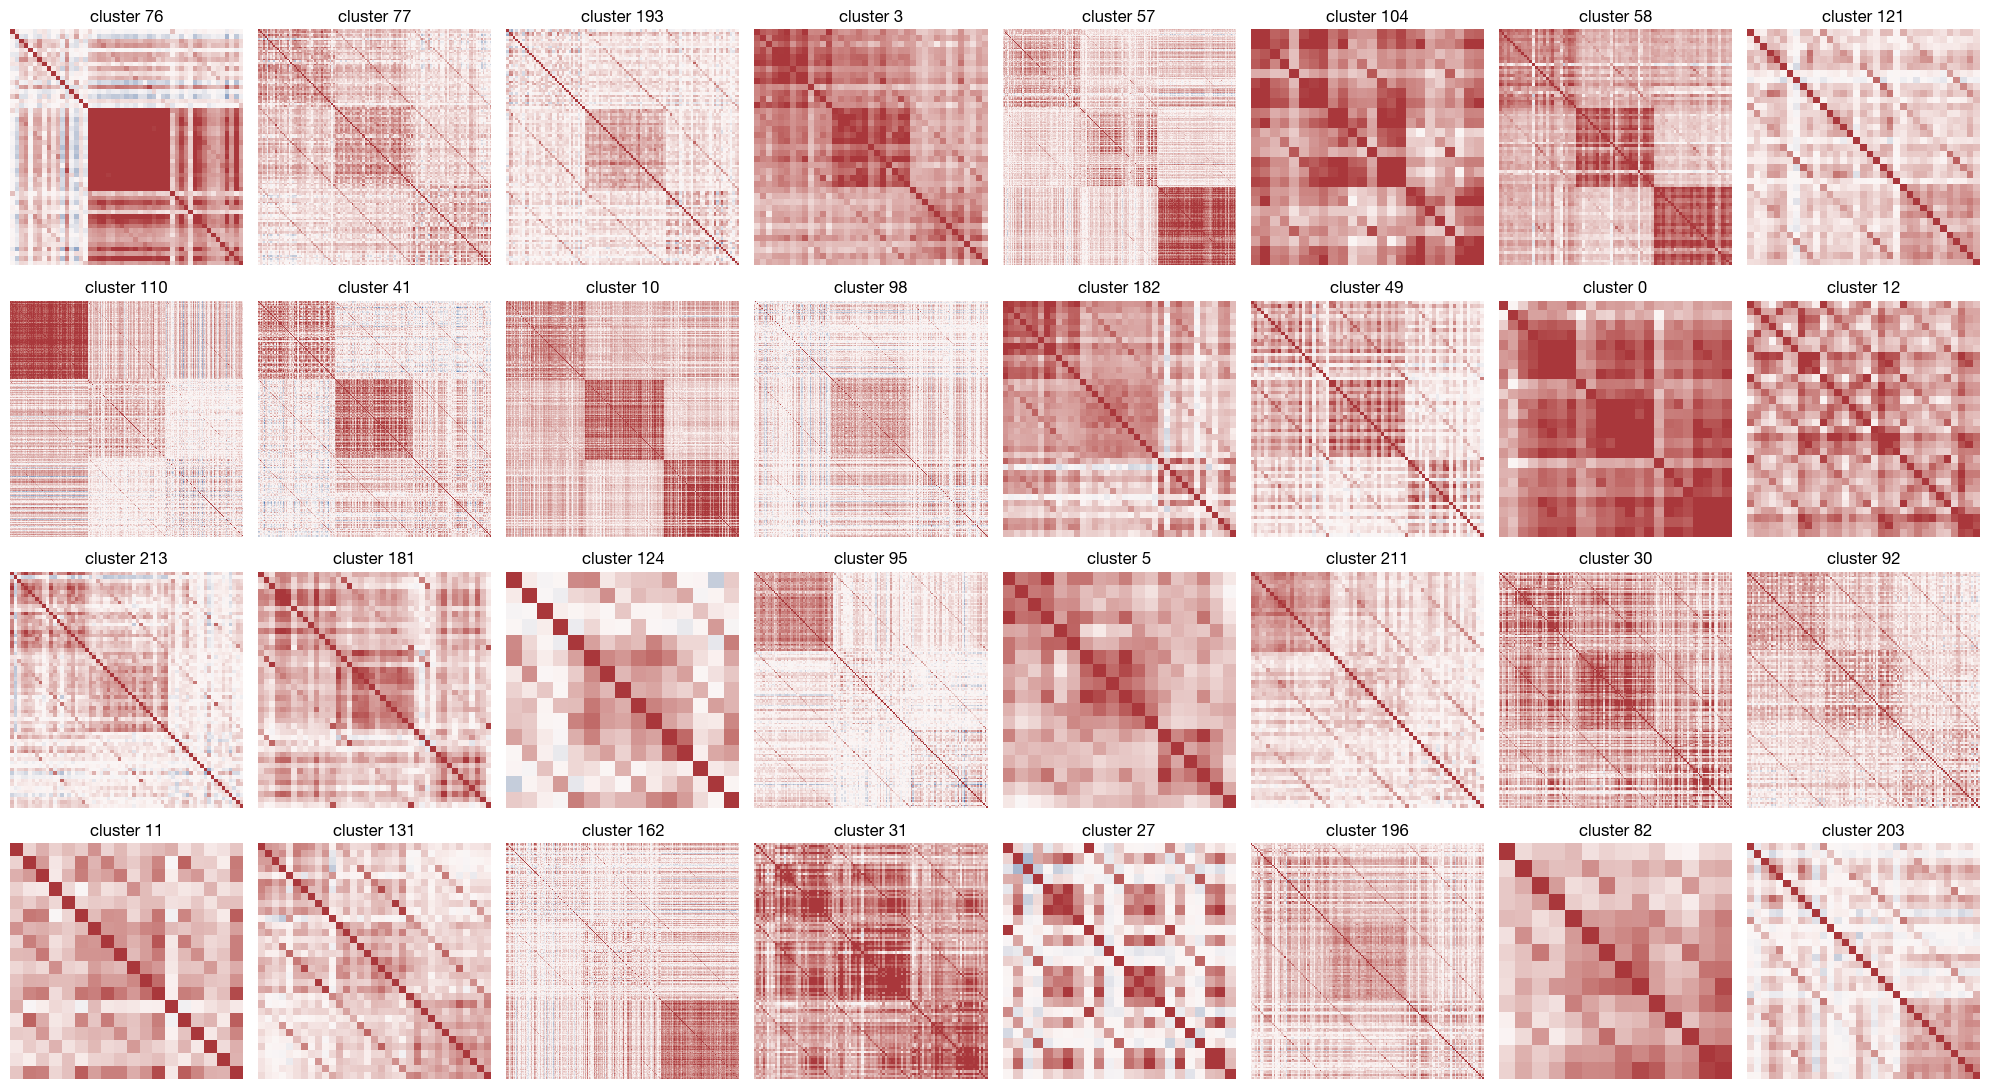

In [124]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = adata_final.obs.hdbscan.unique()[:32]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

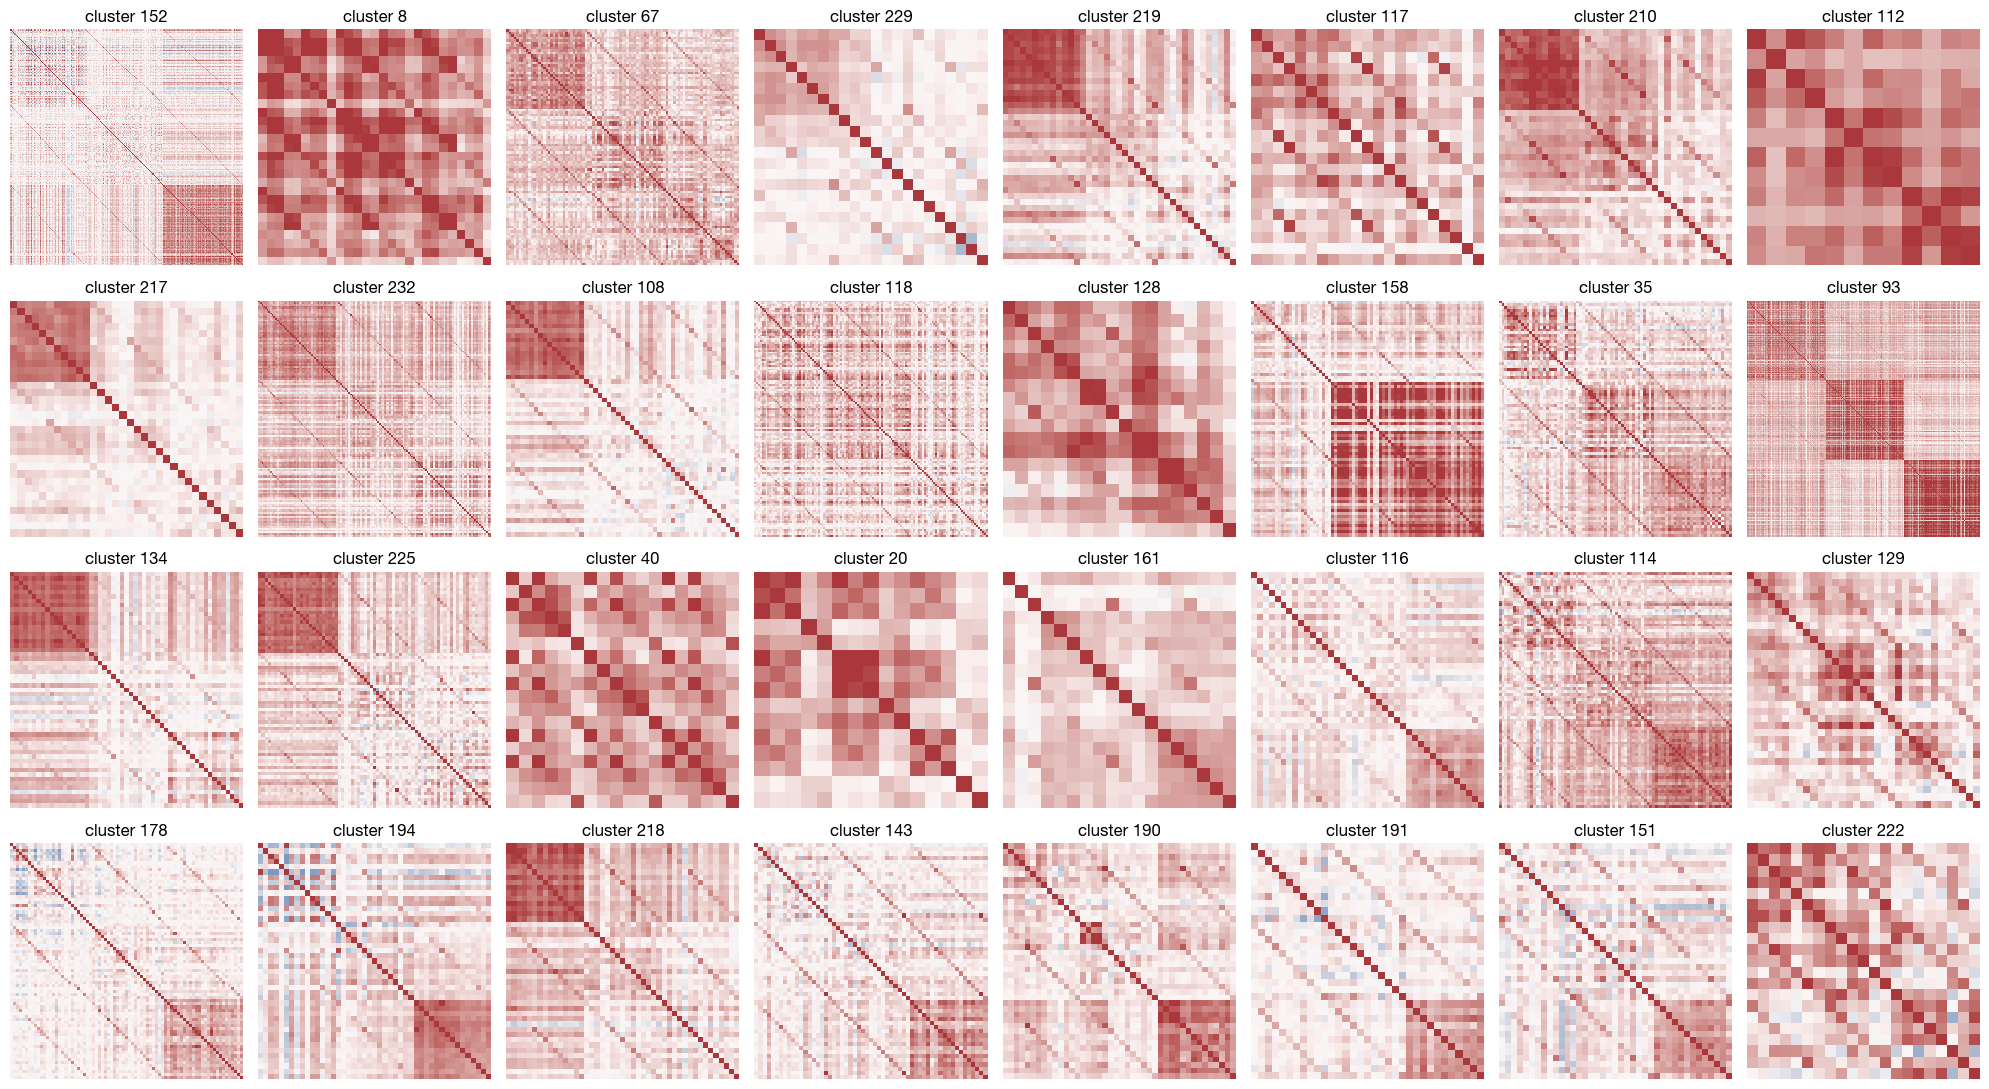

In [125]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = adata_final.obs.hdbscan.unique()[32:64]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

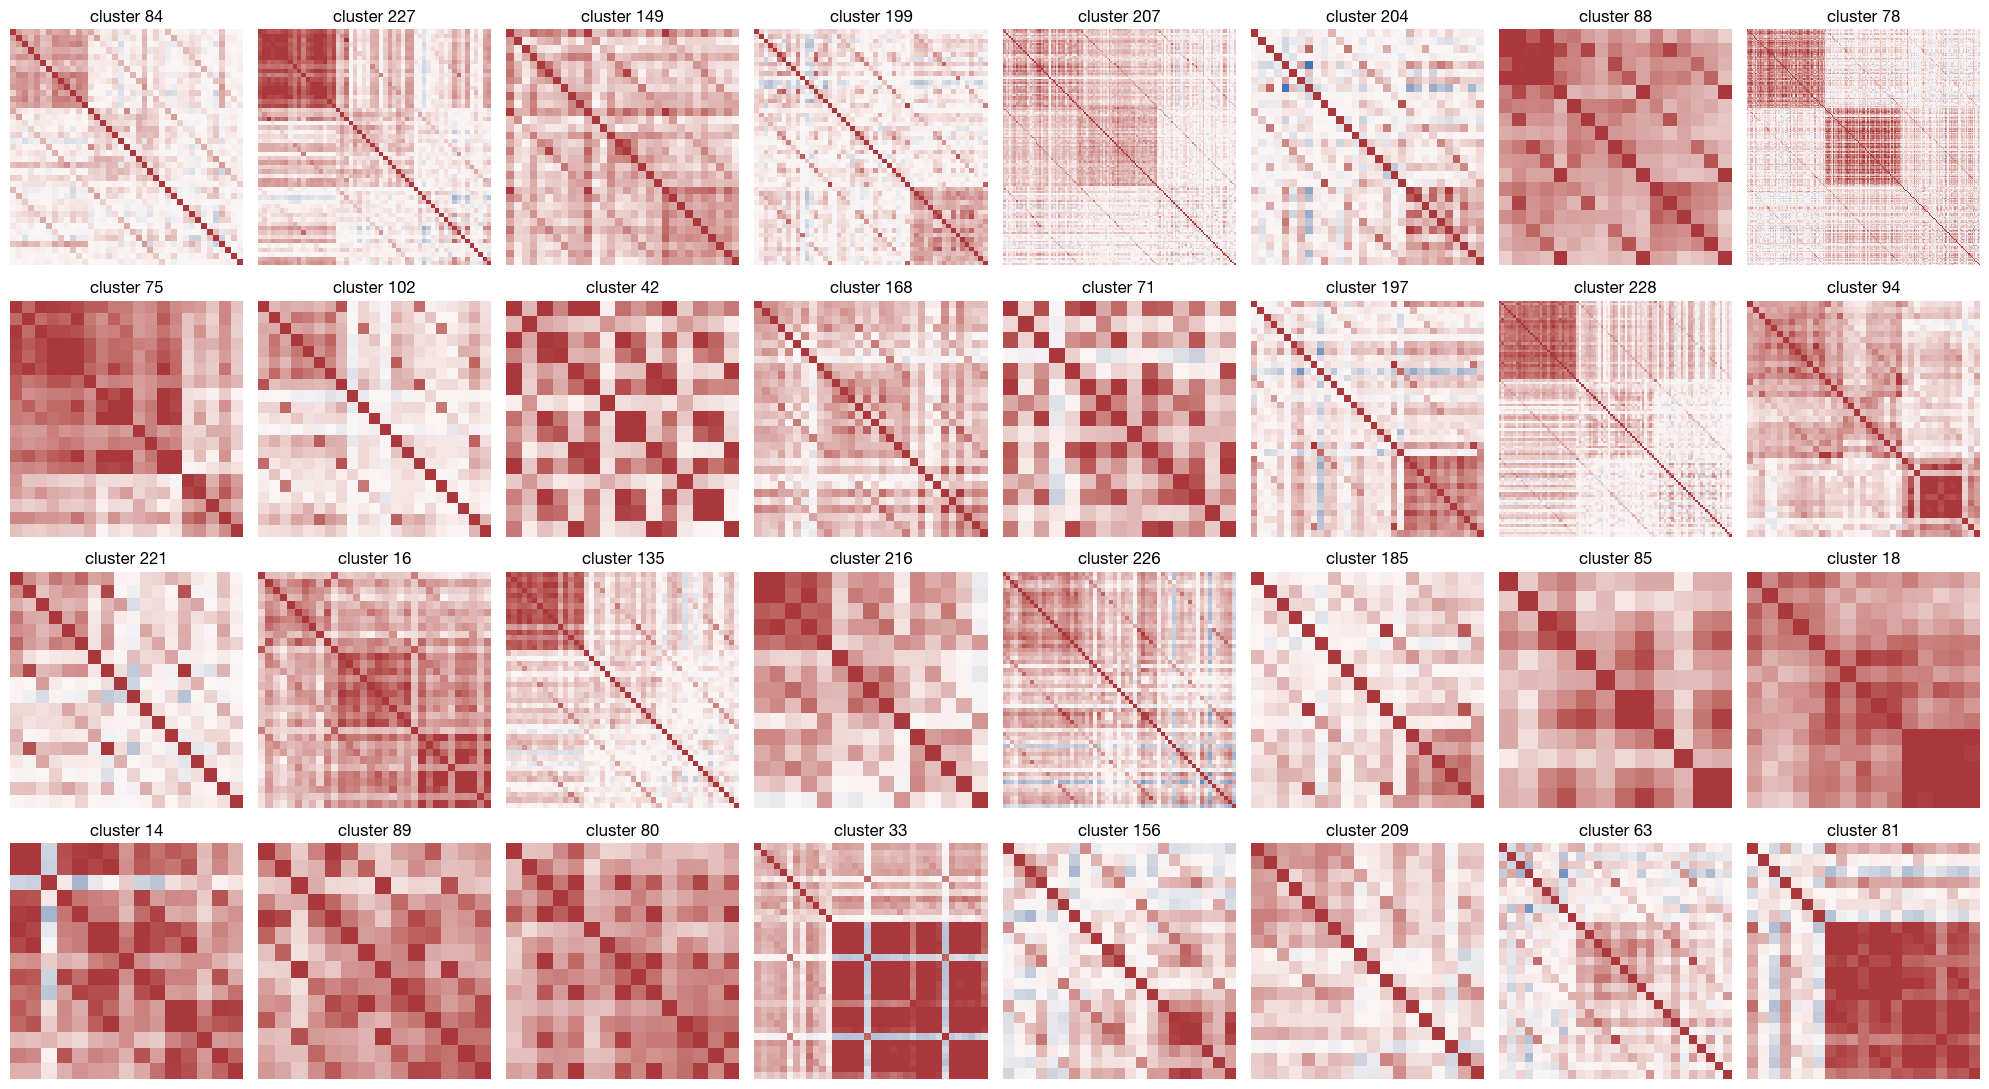

In [126]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = adata_final.obs.hdbscan.unique()[64:96]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

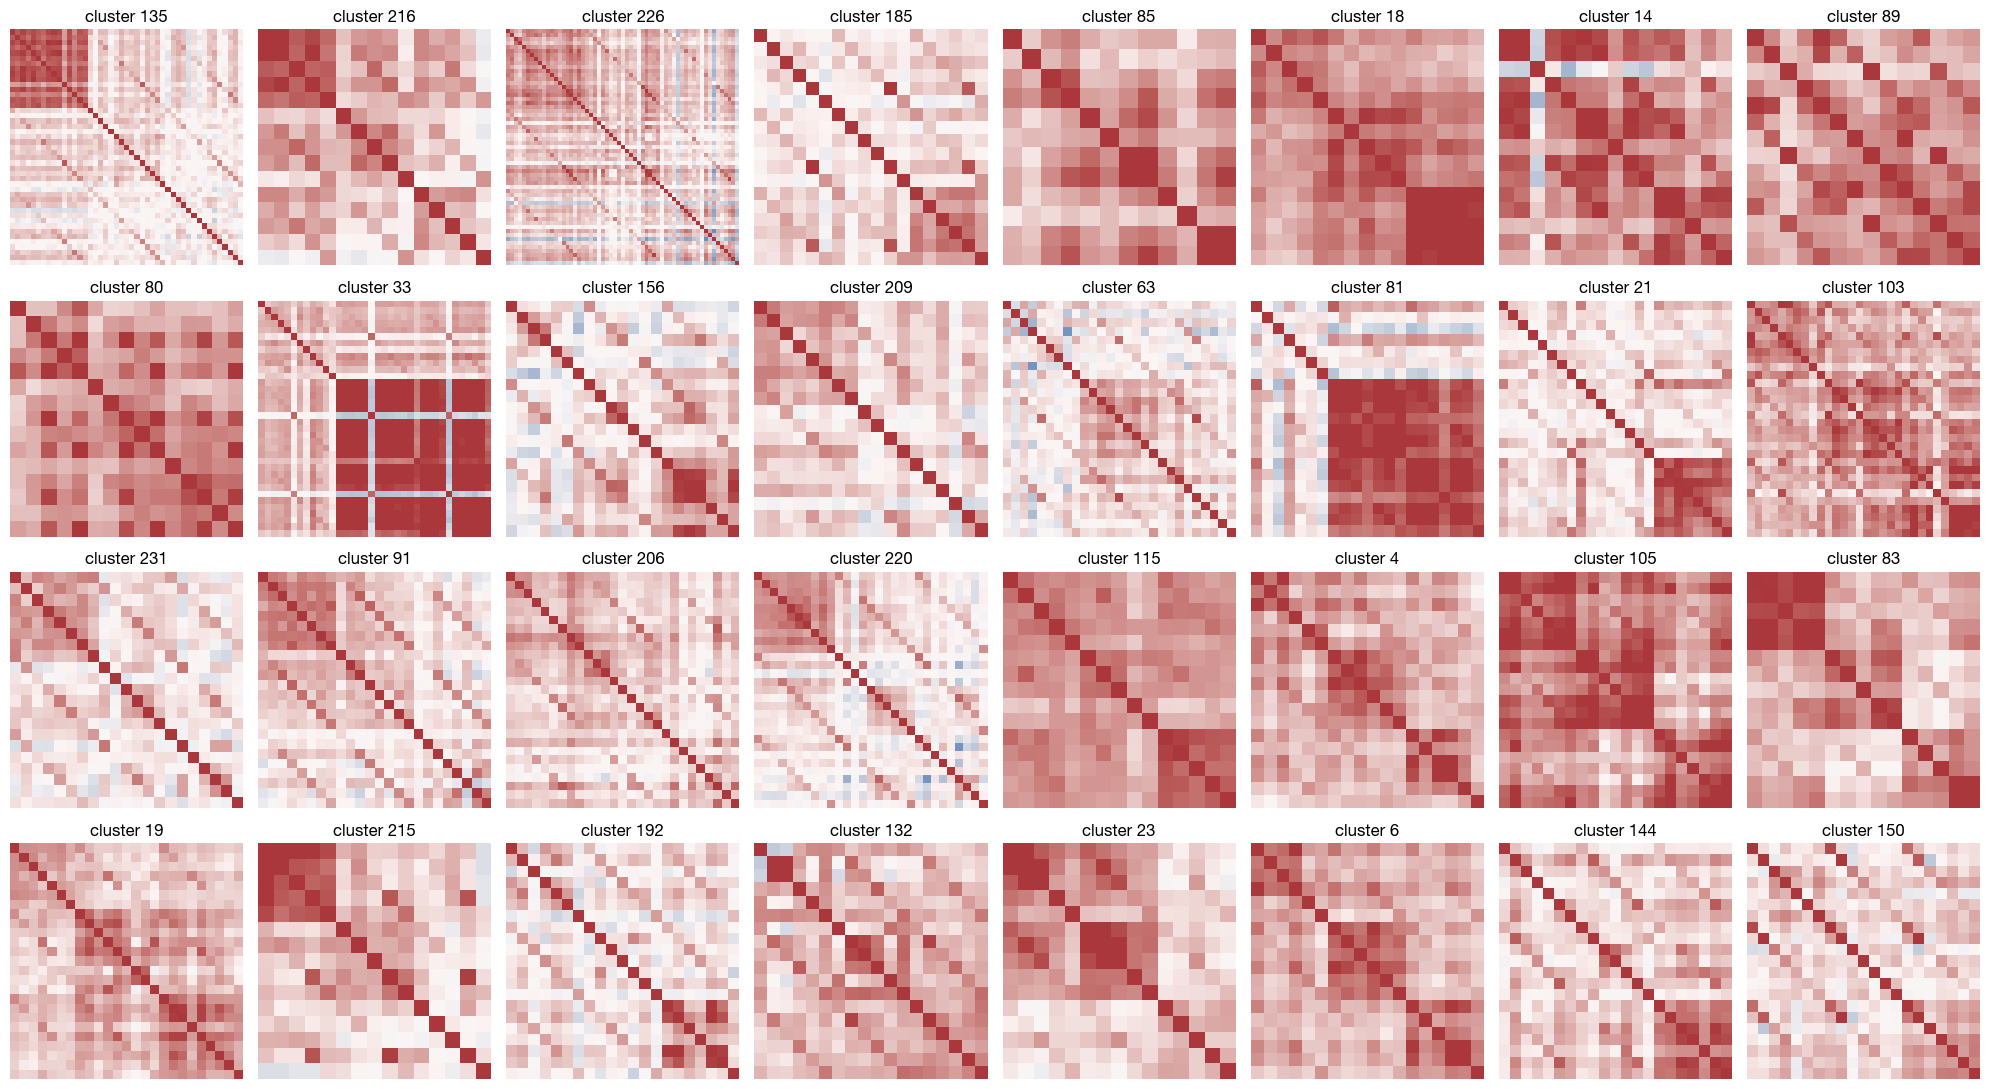

In [130]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = adata_final.obs.hdbscan.unique()[82:]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(4,8,figsize=(20,11))
ax = axes.flatten()
cluster_list = adata_final.obs.hdbscan.unique()[64:96]
for i in range(32):
    genelist = adata_final[adata_final.obs.hdbscan==cluster_list[i]].obs.target_contrast_gene_name.unique().tolist()
    corr_mtx = corr_compute(genelist)
    sns.heatmap(corr_mtx, vmin=-0.5, vmax=0.5, cmap='vlag', ax=ax[i], xticklabels=[], yticklabels=[], cbar=False)
    ax[i].set_title('cluster '+str(cluster_list[i]))
plt.tight_layout()

In [35]:
genelist = ['CASC3', 'SMG1', 'SMG7', 'SMG8', 'SMG9', 'UPF2']

In [117]:
def corr_compute(gene_list):
    mask = adata.obs.target_contrast_gene_name.isin(genelist)
    rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
    stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
    stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
    list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
    list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
    ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
    list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
    list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
    ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
    list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
    list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
    ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
    
    data = np.concatenate([rest, stim8hr, stim48hr])
            
    test = pd.DataFrame(data=data,
                        index=ind,
                        columns=adata.var_names)
    test2 = test.T.corr()
    return test2

In [37]:
genelist = ['MED12', 'MED13', 'MED19', 'TADA1', 'TADA2B', 'TAF5L', 'TAF6L', 'SUPT7L', 'SUPT20H', 'SGF29']

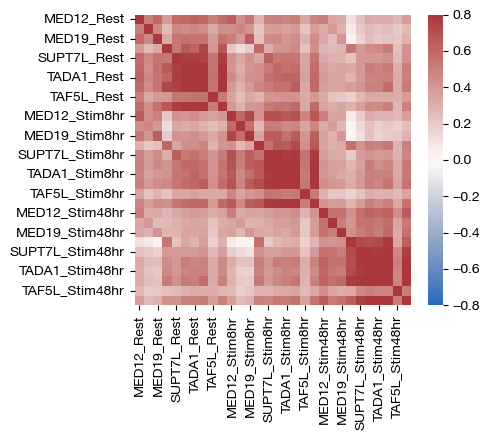

In [38]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(5, 4.5))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [138]:
genelist = ['DPH1', 'DPH2', 'DPH5', 'DPH6', 'DNAJC24', 'TPT1']

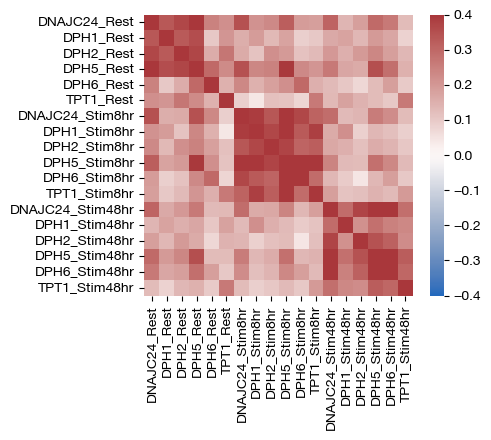

In [139]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(5, 4.5))
sns.heatmap(test2, vmin=-0.4, vmax=0.4, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [41]:
genelist = ['LAT', 'PLCG1', 'ZAP70', 'LCP2', 'CD247', 'CD3E', 'CD3D', 'CD3G', 'VAV1']

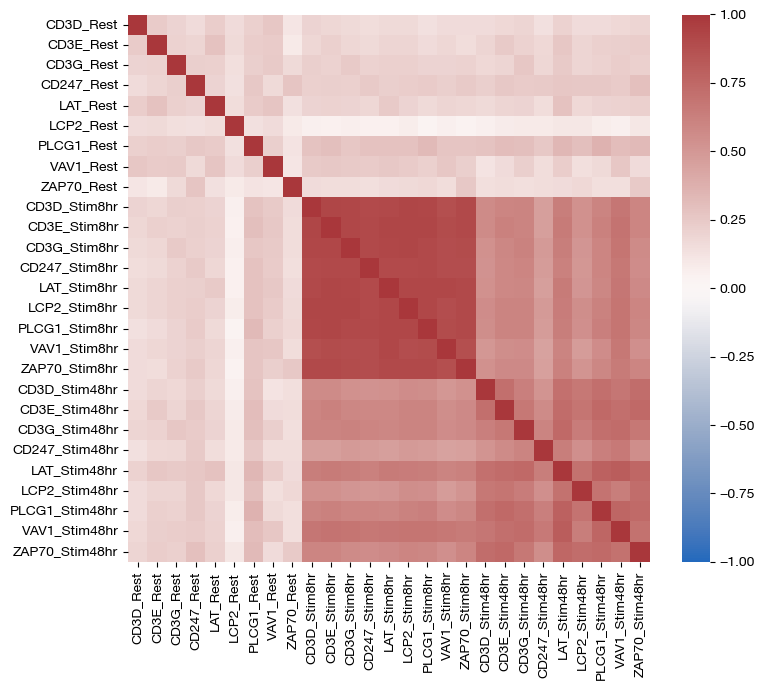

In [44]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(test2, vmin=-1, vmax=1, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [51]:
genelist = ['SLC25A1', 'PDHB', 'MDH2', 'DLAT', 'PDHA1', 'CS', 'ACLY', 'STYXL1']

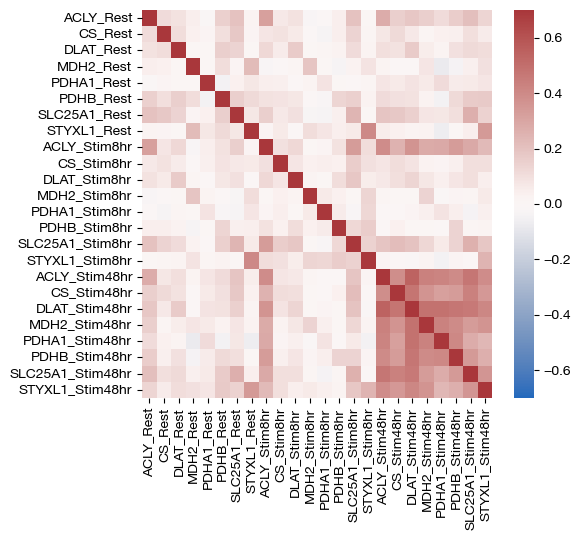

In [55]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [62]:
genelist = ['UBE2H', 'MAEA', 'YPEL5', 'RMND5A', 'GID8']

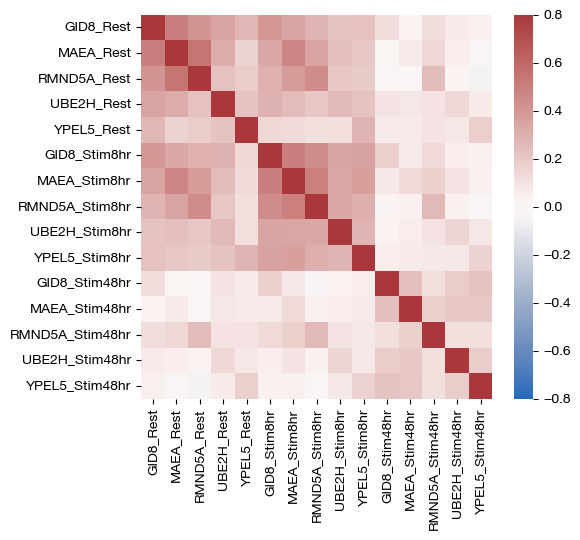

In [64]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [65]:
genelist = ['EMC7', 'EMC4', 'EMC3', 'MMGT1']

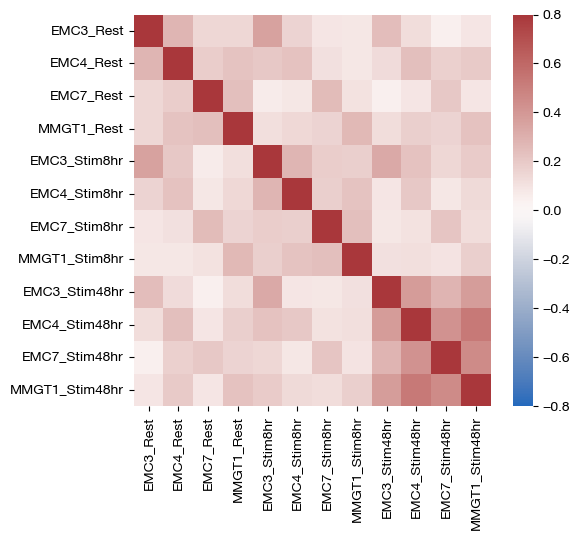

In [66]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [72]:
genelist = ['CD28', 'BCL10', 'HACD4', 'HELT', 'NDFIP2', 'CARMIL2', 'MALT1']

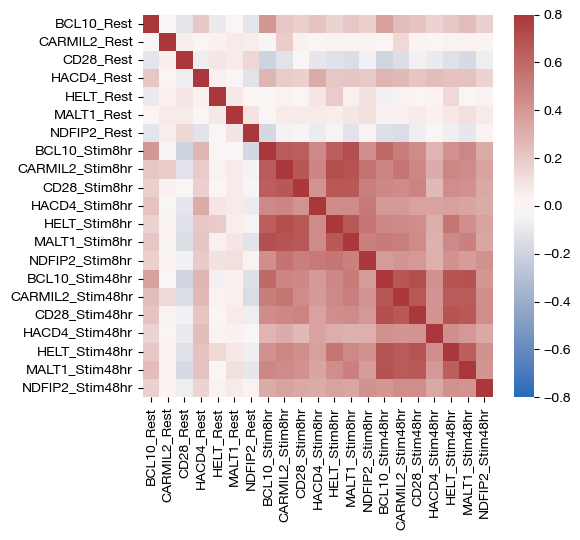

In [75]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [140]:
genelist = ['LAMTOR2', 'LAMTOR3', 'LAMTOR4', 'RRAGA', 'RRAGC', 'WDR24', 'WDR59', 'MIOS', 'RPTOR']

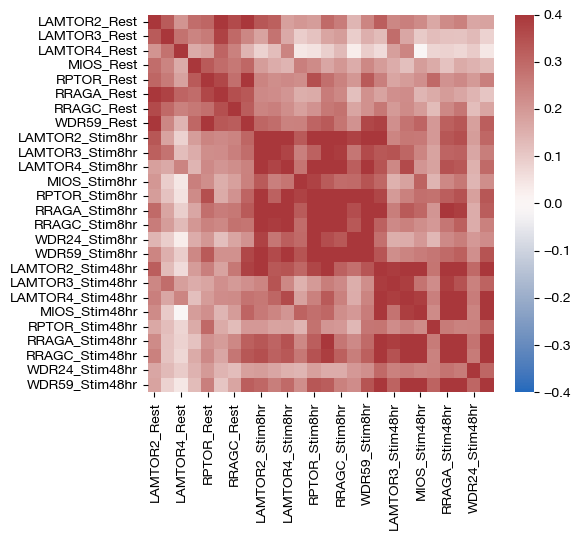

In [142]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.4, vmax=0.4, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [83]:
genelist = ['C11orf54', 'CEP89', 'GALNT6', 'GPS2', 'L2HGDH', 'PPM1D', 'VEZT']

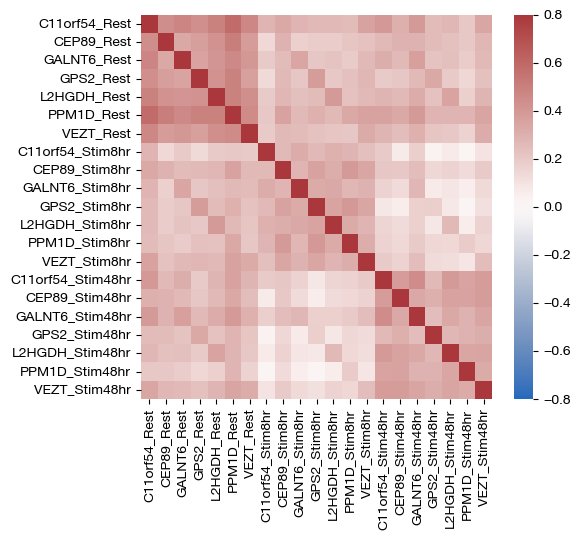

In [84]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.8, vmax=0.8, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [91]:
genelist = ['DDX1', 'METTL1', 'FAM98B', 'TRMT61A', 'RTRAF', 'ADAT3', 'ADAT2']

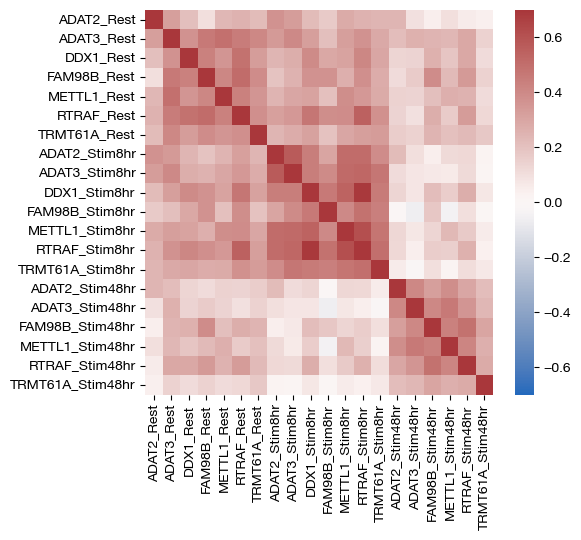

In [94]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [95]:
genelist = ['ITSN1', 'TP73', 'ZHX3', 'TMEM45B', 'IMMT', 'COL4A1', 'PCNX4', 'PTP4A1', 'OSR1', 'CUL4B', 'OAF', 'MLYCD', 'MSL2', 'FAM98C', 'B3GAT1', 'FITM1', 'CCND2', 'CASP9']

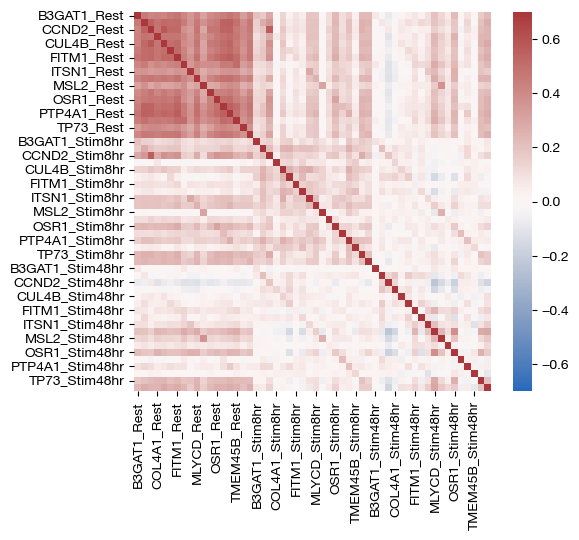

In [96]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [97]:
genelist = ['CHORDC1', 'DMRTC2', 'FAM98B', 'GANAB', 'UVRAG', 'CCDC22', 'PEX16', 'AK9', 'PATL1', 'BEX3', 'FBXO11', 'STAT3', 'PMVK', 'HPRT1', 'CREB3L2', 'SEC62', 'TIPARP', 'LCK', 'EIPR1', 'STAT5B', 'C19orf54', 'PGK1', 'NDST2', 'UBR4', 'WDR44']

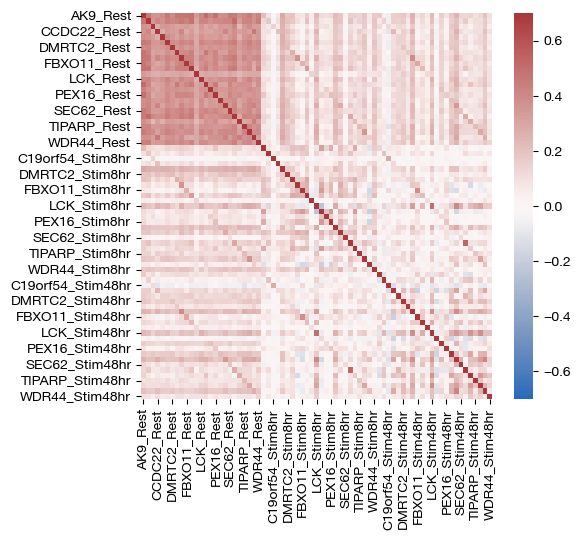

In [98]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [99]:
genelist = ['TNFRSF10B', 'GJC1', 'CCL5', 'MORC2', 'C11orf54', 'RPS6KB1', 'PUDP', 'TOP2B', 'COX20', 'IWS1', 'MOSPD1', 'ABHD14A', 'SLC25A22', 'NABP1', 'LMNA']

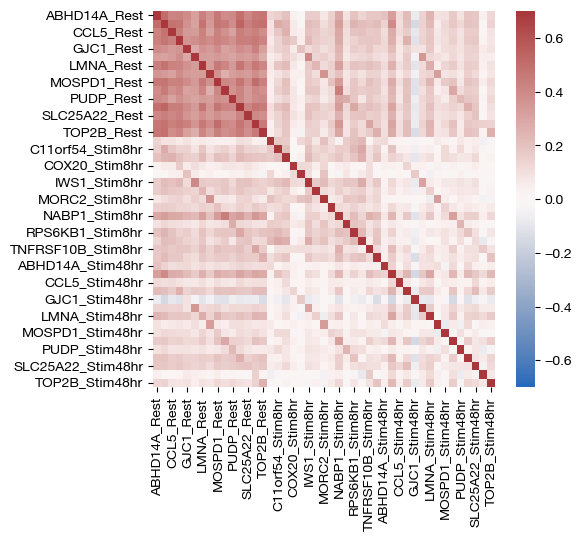

In [100]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [101]:
genelist = ['NCBP3', 'YEATS2', 'DNAJA3', 'FBXO3', 'DMRTA2', 'DBF4', 'SMARCA5', 'MED15', 'MOSMO', 'TNK1', 'PPM1D', 'OTUD1', 'LIG1']

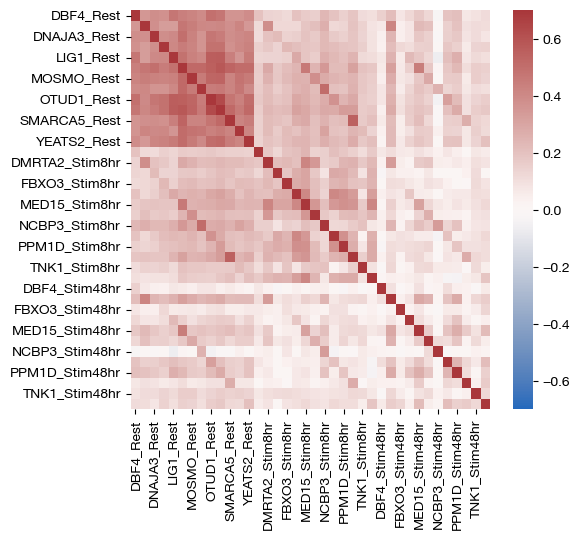

In [102]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [103]:
genelist = ['ST7L', 'SEC24A', 'CBFA2T2', 'SLC35D2', 'SLC35A2', 'RHOC', 'APOBEC3G', 'DNAJC4', 'SBF1', 'TBC1D14', 'TMEM245', 'AMER1', 'LENG8', 'PDK1', 'PIAS1', 'FAM3C', 'SRD5A3', 'ADCY4']

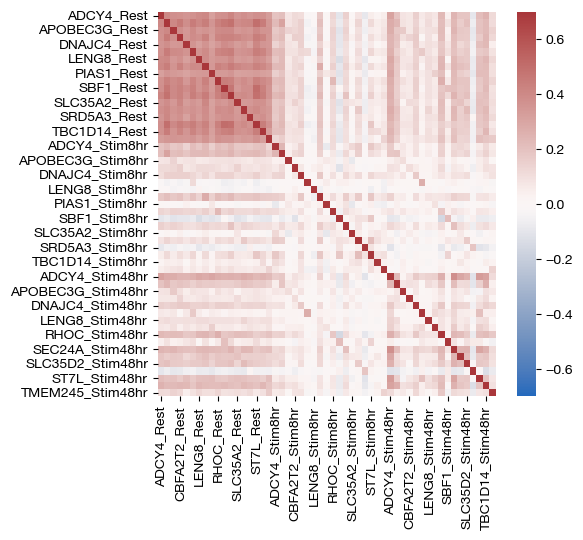

In [104]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()

In [105]:
genelist = ['GNLY', 'CEP104', 'TNS1', 'PIGH', 'PTCH1', 'PRRT2', 'PBX2', 'SP100', 'ATXN1L', 'NMRAL1', 'TRIM39', 'UBL3', 'GZF1', 'ZNF165', 'CTSF']

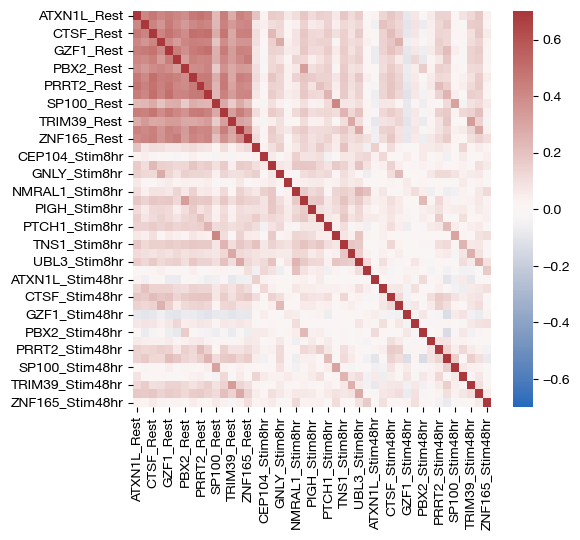

In [106]:
mask = adata.obs.target_contrast_gene_name.isin(genelist)
rest = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim8hr = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
stim48hr = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].X.copy()
list1 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Rest')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim8hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]
list1 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.target_contrast_gene_name.values.tolist()
list2 = adata[adata[mask&(adata.obs.culture_condition=='Stim48hr')].obs.sort_values(by='target_contrast_gene_name').index].obs.culture_condition.values.tolist()
ind = ind + [f"{item1}_{item2}" for item1, item2 in zip(list1, list2)]

data = np.concatenate([rest, stim8hr, stim48hr])
        
test = pd.DataFrame(data=data,
                    index=ind,
                    columns=adata.var_names)
test2 = test.T.corr()

fig, ax = plt.subplots(figsize=(6, 5.5))
sns.heatmap(test2, vmin=-0.7, vmax=0.7, cmap='vlag', ax=ax)
plt.tight_layout()
plt.show()